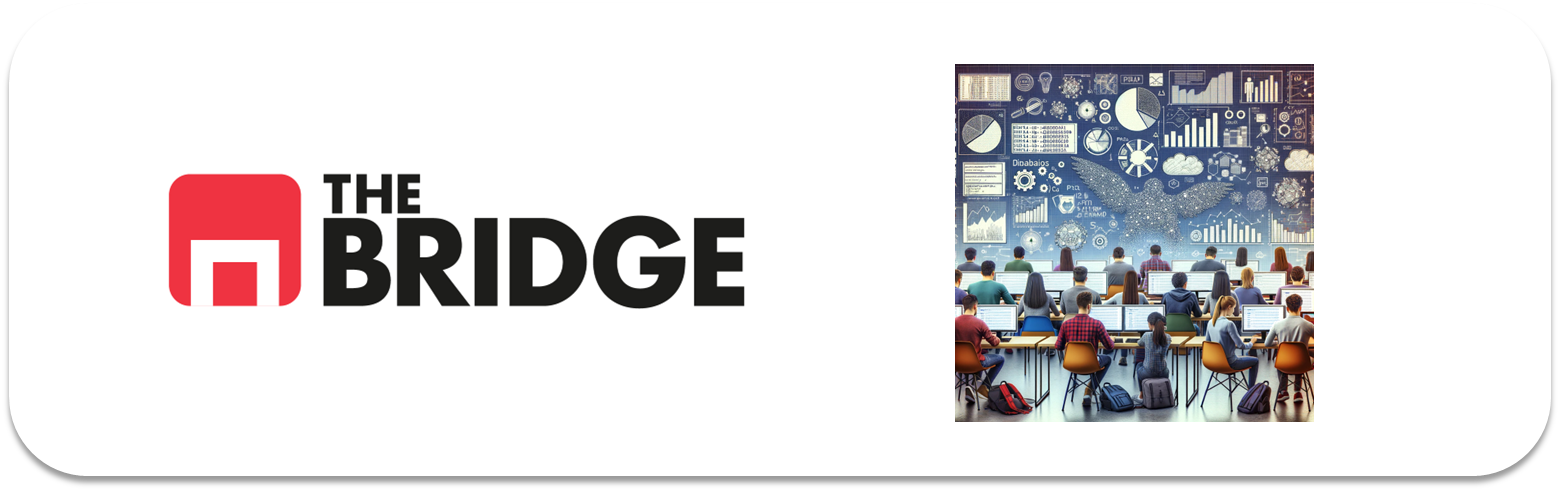

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [16]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from bootcampviztools import pinta_distribucion_categoricas, plot_categorical_numerical_relationship, plot_grouped_histograms


In [ ]:
 # 1. Cargar el dataset Boston Housing desde el archivo 'obligatoria_hard.csv' ubicado en la carpeta './data/hard_to_find/'.
df_boston = pd.read_csv('./data/hard_to_find/obligatoria_hard.csv', sep='|')
# este csv viene separado por | en lugar de comas, hay que tenerlo en cuenta a la hora de cargar dfs en el futuro
df_boston.head(10)   

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [12]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [13]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


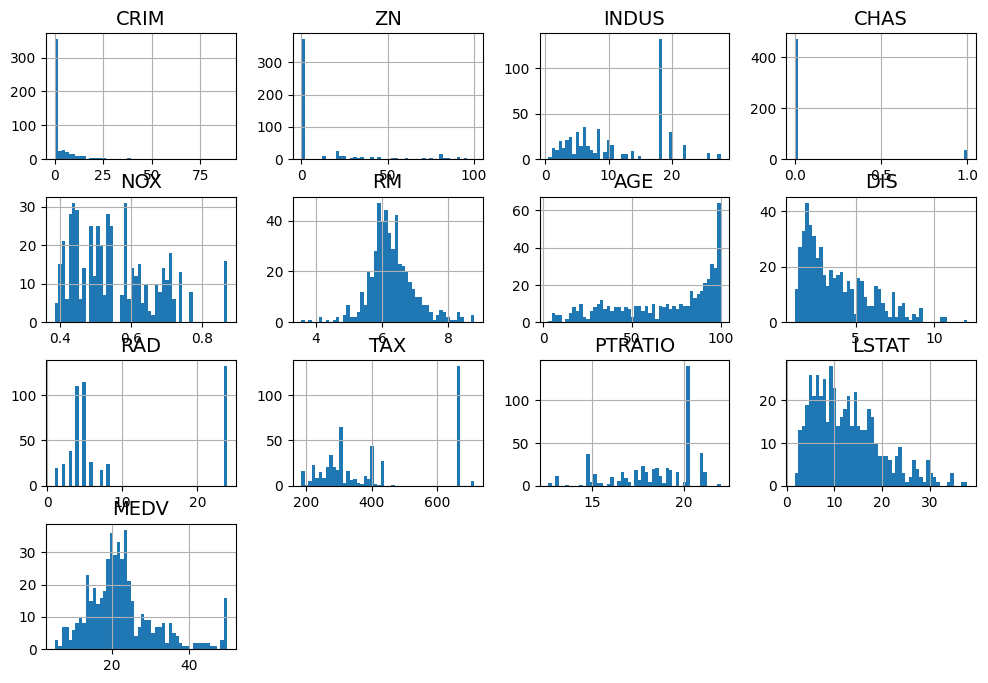

In [ ]:
# 2. EDA para entender las variables y su distribución. Elegimos la variable objetivo (target) que queremos predecir.
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df_boston.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

# Elegiremos como target la variable 'MEDV' (precio medio de las viviendas en miles de dólares) ya que es la variable que queremos predecir.

In [24]:
# 3. split del dataset en conjunto de entrenamiento y conjunto de prueba.
train_set, test_set = train_test_split(df_boston, test_size=0.2, random_state=42)
print(f"Train set size: {train_set.shape}, Test set size: {test_set.shape}")

Train set size: (404, 13), Test set size: (102, 13)


In [34]:
# 4. parejas x - y de train y test sets.
X_train = train_set.drop("MEDV", axis=1)
y_train = train_set["MEDV"].copy()  
X_test = test_set.drop("MEDV", axis=1)
y_test = test_set["MEDV"].copy()

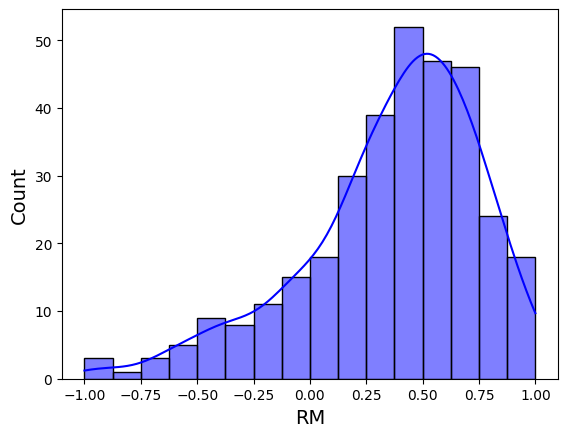

In [75]:
# 5. mini EDA y separamos las features:
sns.histplot(X_train['RM'], color='Blue', kde = True) # vemos la distribucion de la variable objetivo MEDV
plt.show()


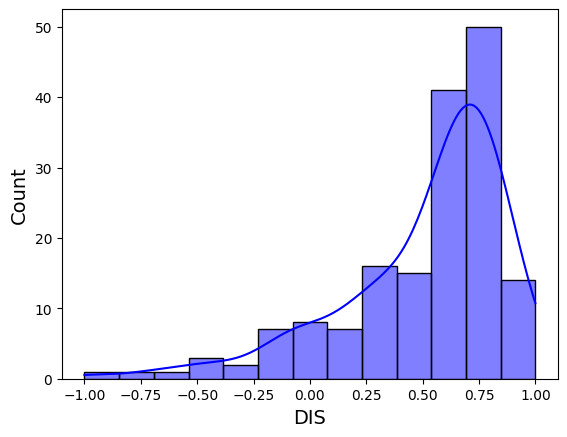

In [76]:
sns.histplot(X_train['DIS'], color='Blue', kde = True) # vemos la distribucion de la variable objetivo MEDV
plt.show()

In [78]:
# 5 separamos las features:
# vemos las correlaciones entre variables numéricas con la variable objetivo MEDV pintando las mas relevantes
corr_matrix = train_set.corr(numeric_only=True)
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.710680
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE       -0.340216
CRIM      -0.380091
RAD       -0.387467
NOX       -0.415768
TAX       -0.459795
INDUS     -0.470546
PTRATIO   -0.491210
LSTAT     -0.736422
Name: MEDV, dtype: float64

In [79]:
features = corr_matrix["MEDV"][corr_matrix["MEDV"]>0.05].index.tolist() # en feature metemos las variables con correlacion mayor a 0.5 con MEDV
features # vemos las variables seleccionadas, mayor a 0.05 porque son las mas relevantes

['ZN', 'CHAS', 'RM', 'DIS', 'MEDV']

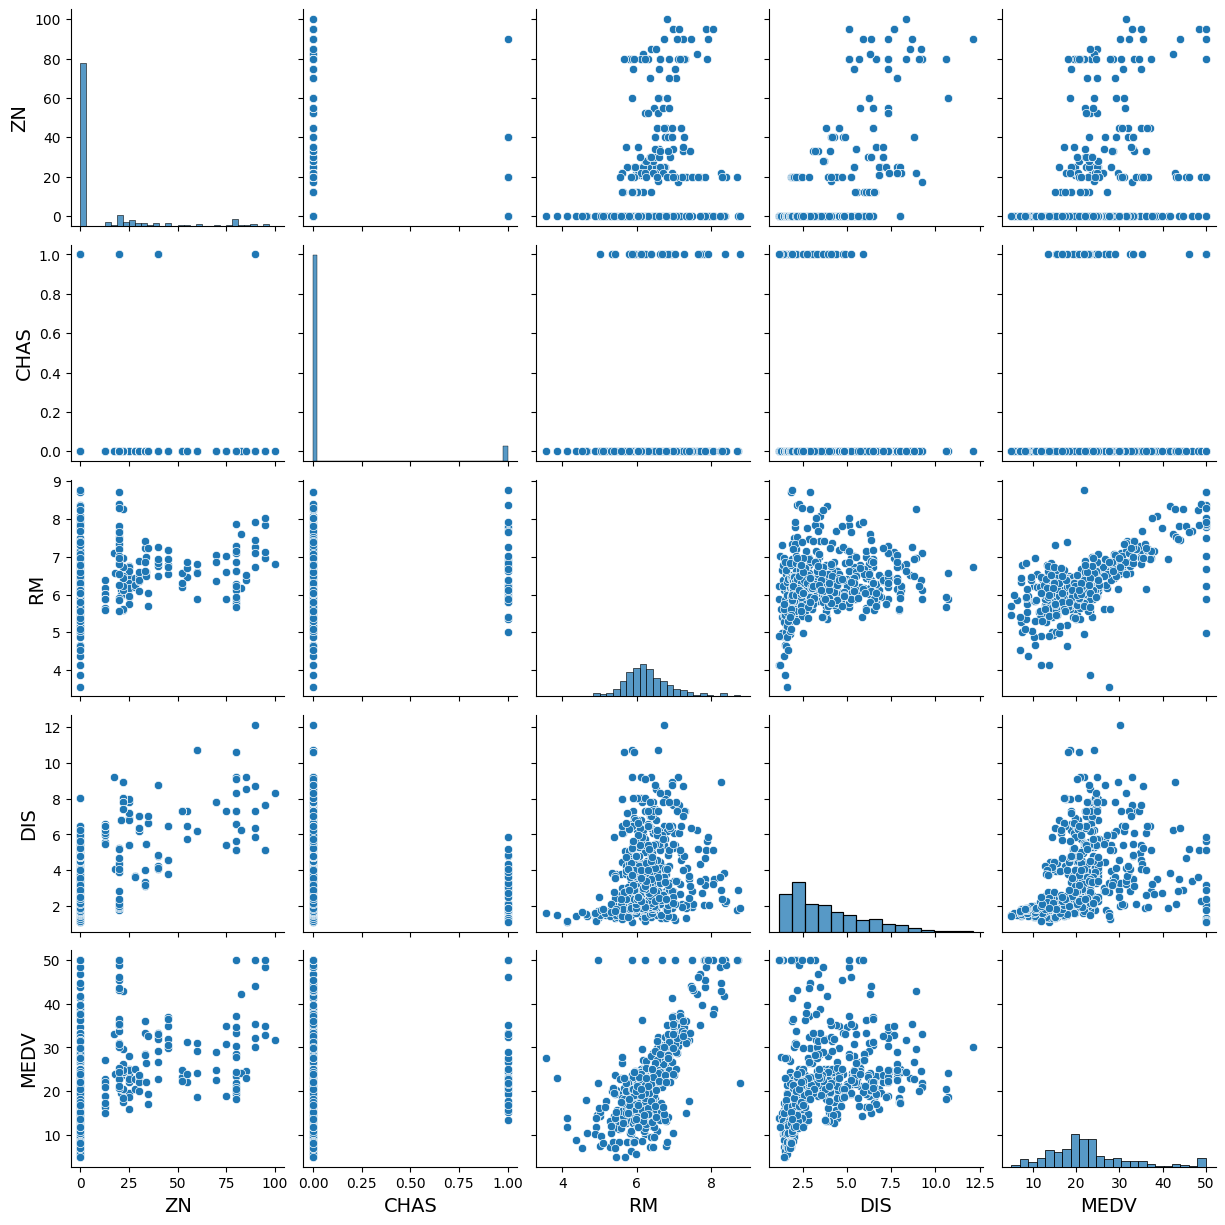

In [31]:
sns.pairplot(df_boston[features]); 

In [ ]:
# 6. tratamiento de features para que funcionen lo mejor posible en los modelos de regresión lineal regularizada.
# min_max_scaler para escalar las variables numéricas:

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# 1. Imputar los NaN
imputer = SimpleImputer(strategy="median") # usamos la mediana para imputar los valores faltantes
X_train[features_num] = imputer.fit_transform(X_train[features_num]) # ajustamos el imputer al conjunto de entrenamiento y transformamos
X_test[features_num]  = imputer.transform(X_test[features_num]) # transformamos el conjunto de prueba con el imputer ajustado al conjunto de entrenamiento

# 2. Escalar
scaler = MinMaxScaler(feature_range=(-1,1)) # escalamos entre -1 y 1
X_train[features_num] = scaler.fit_transform(X_train[features_num]) # ajustamos el scaler al conjunto de entrenamiento y transformamos
X_test[features_num]  = scaler.transform(X_test[features_num]) # transformamos el conjunto de prueba con el scaler ajustado al conjunto de entrenamiento


In [94]:
resultado_min_max.describe()

,ZN,CHAS,RM,DIS
count,404.000000,404.000000,404.000000,404.000000
mean,-0.768614,-0.856436,-0.002281,-0.512845
std,0.463050,0.516894,0.288571,0.387605
min,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-0.175310,-0.825719
50%,-1.000000,-1.000000,-0.045353,-0.627868
75%,-0.600000,-1.000000,0.128229,-0.223199
max,1.000000,1.000000,1.000000,1.000000


In [95]:
# standardization para las variables numéricas, para comparar resultados:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
resultado_standardization = pd.DataFrame(standard_scaler.fit_transform(X_train[features_num]), columns=features_num)
resultado_standardization.head() # vemos el resultado del escalado

,ZN,CHAS,RM,DIS
0,-0.500320,-0.278089,0.191048,0.204350
1,-0.500320,-0.278089,0.191048,-2.038218
2,1.013271,-0.278089,-2.247244,0.472745
3,-0.500320,-0.278089,-1.135038,0.204350
4,-0.500320,-0.278089,0.191048,0.204350


<Axes: >

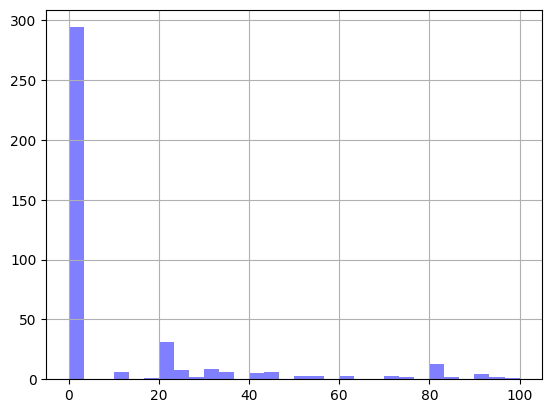

In [82]:
# y las visualizamos para comparar:
X_train["ZN"].hist(bins=30, alpha=0.5, color='blue', label='Original ZN')
# esta variable no muestra mucha diferencia entre escalados

<Axes: >

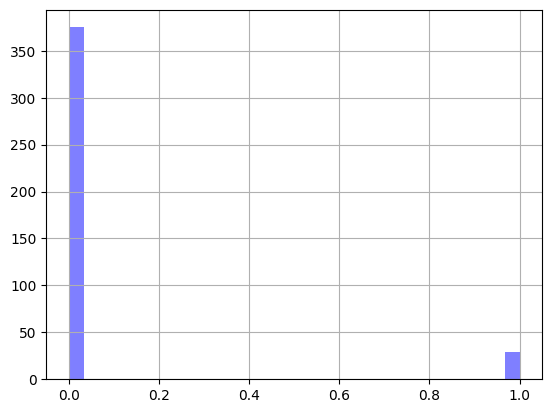

In [ ]:
X_train["CHAS"].hist(bins=30, alpha=0.5, color='blue', label='Original CHAS')
# esta tampoco muestra mucha diferencia entre escalados

<Axes: >

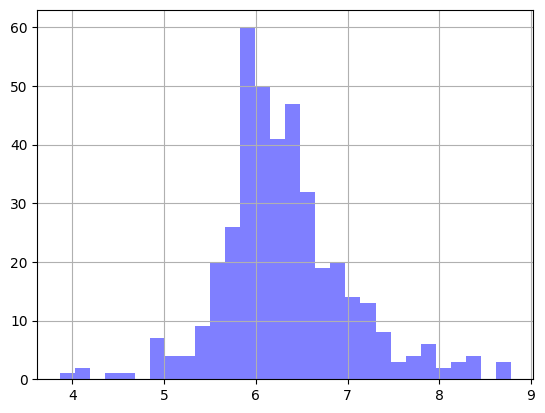

In [ ]:
X_train["RM"].hist(bins=30, alpha=0.5, color='blue', label='Original RM') # esta es la que mas diferencia muestra entre escalado min-max y standardization

<Axes: >

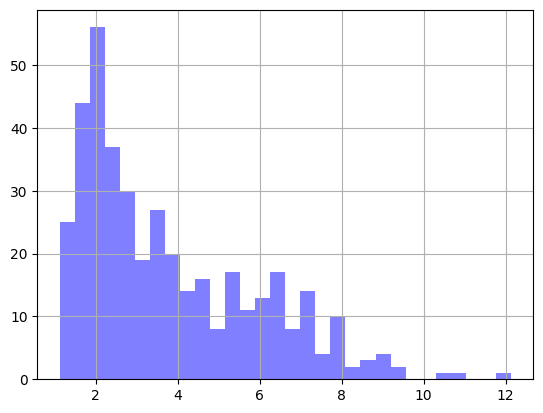

In [ ]:
X_train["DIS"].hist(bins=30, alpha=0.5, color='blue', label='Original DIS') # esta muestra diferencia entre escalados pero no tanta como RM

ValueError: supplied range of [-inf, 4.605170185988092] is not finite

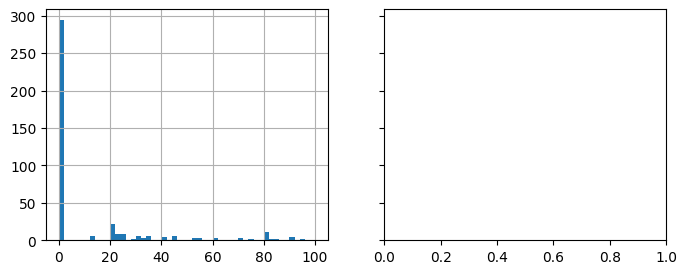

In [44]:
# vamos a transformar las otras 3 features que son numéricas pero no tienen tanta correlación con MEDV: ZN, CHAS, DIS
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
train_set["ZN"].hist(ax=axs[0], bins=50)
train_set["ZN"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("ZN, proportion of residential land zoned for lots over 25,000 sq.ft.")
axs[1].set_xlabel("Log of ZN")
axs[0].set_ylabel("Number of occurrences")
plt.show()

ValueError: supplied range of [-inf, 0.0] is not finite

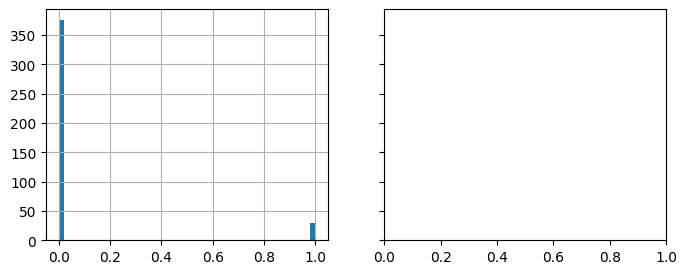

In [80]:
# vamos a transformar las otras 3 features que son numéricas pero no tienen tanta correlación con MEDV: ZN, CHAS, DIS
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
train_set["CHAS"].hist(ax=axs[0], bins=50)
train_set["CHAS"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("CHAS")
axs[1].set_xlabel("Log of CHAS")
axs[0].set_ylabel("Number of occurrences")
plt.show()

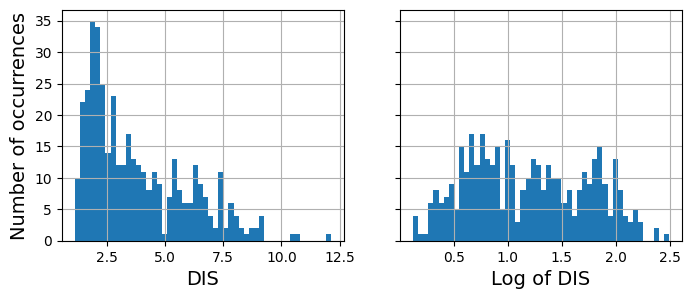

In [97]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
train_set["DIS"].hist(ax=axs[0], bins=50)
train_set["DIS"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("DIS")
axs[1].set_xlabel("Log of DIS")
axs[0].set_ylabel("Number of occurrences")
plt.show()

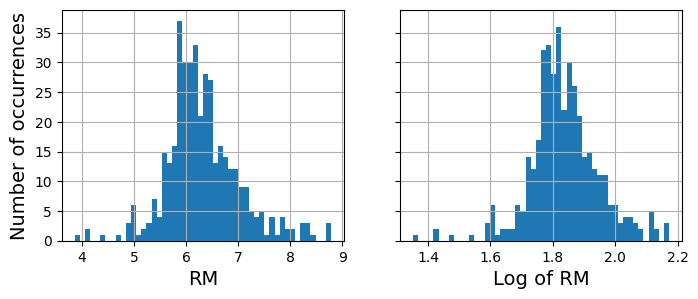

In [98]:
fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
train_set["RM"].hist(ax=axs[0], bins=50)
train_set["RM"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("RM")
axs[1].set_xlabel("Log of RM")
axs[0].set_ylabel("Number of occurrences")
plt.show()

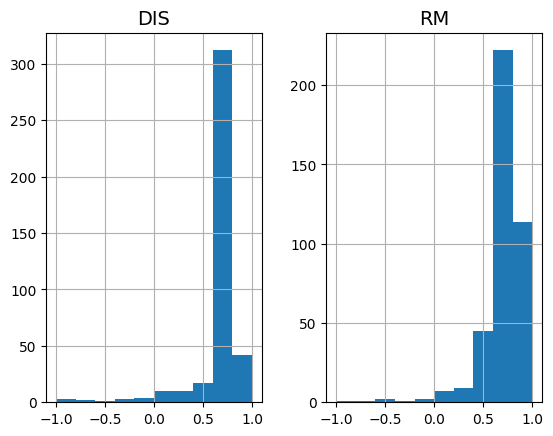

In [96]:
# vemos que la transformación logarítmica mejora la distribución de las variables DIS y RM, pero no tanto la de CHAS ni ZN. 
# Entonces, aplicaremos la transformación logarítmica a DIS y RM en el conjunto de entrenamiento y prueba.

features_num_definitivas = ["DIS","RM"]
X_train[features_num_definitivas].hist();

In [99]:
# aplicamos la transformación logarítmica a DIS y RM en el conjunto de entrenamiento:
for col in ["DIS","RM"]:
    X_train[f"log_{col}"] = X_train[col].apply(np.log)
    X_train[col] = min_max_scaler.fit_transform(X_train[[f"log_{col}"]])


In [100]:
# 7. Construimos el modelo de regresión lineal: 
# primero, calculamos el MSE:
from sklearn.metrics import mean_squared_error

# hacemos el regresor lineal:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

# arboles de decisión para la regresión:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") # de nuevo, para asegurarnos de que no hay NaN en DIS y RM
X_train[["DIS","RM"]] = imputer.fit_transform(X_train[["DIS","RM"]]) # ajustamos el imputer al conjunto de entrenamiento y transformamos
X_test[["DIS","RM"]]  = imputer.transform(X_test[["DIS","RM"]]) # transformamos el conjunto de prueba con el imputer ajustado al conjunto de entrenamiento


In [101]:
features
target = "MEDV"

In [109]:
# separamos las variables target del dataset de train y nos quedamos solo con las features definitivas:
X = X_train[features_num_definitivas].copy() # copiamos para no modificar el original
y = y_train # y_train ya es una serie con los valores de MEDV, entonces no hace falta convertir a array

In [110]:
# ahora entrenamos y creamos modelos para cada algoritmo:
lin_reg.fit(X, y)
tree_reg.fit(X, y)

,"criterion criterion: {""squared_error"", ""friedman_mse"", ""absolute_error"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in the half mean Poisson deviance to find splits... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 0.24 Poisson deviance criterion.",'squared_error'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.For an example of how ``max_depth`` influences the model, see:ref:`sphx_glr_auto_examples_tree_plot_tree_regression.py`.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_l

In [ ]:
# 8. Evaluamos el modelo en el conjunto de prueba y comparamos los resultados obtenidos con los diferentes algoritmos.
# primero, las predicciones:
train_pred_lin = lin_reg.predict(X) # predicciones del modelo de regresión lineal
train_pred_tree = tree_reg.predict(X) # predicciones del modelo de árbol de regresión

train_pred_lin # vemos las predicciones del modelo de regresión lineal

array([23.2921035 , 22.51927225, 14.81776115, 20.00759115, 23.2921035 ,
       23.10997567, 15.76921015, 23.15508275, 21.11363031, 24.08960641,
       22.68935082, 20.9725849 , 24.4063967 , 21.86059454, 24.7637758 ,
       22.33641907, 23.2921035 , 23.37843712, 23.39770759, 23.47019978,
       23.2921035 , 12.09677075, 21.33755927, 15.92375093, 23.58953789,
       24.39986869, 21.11363031, 24.36944049, 23.2921035 , 22.64061374,
       18.7786705 , 19.64384233, 23.2921035 , 23.18228214, 17.67258992,
       24.15847891, 23.69318825, 21.83815517, 23.2921035 , 22.94525818,
       23.33595381, 23.2921035 , 23.2921035 , 22.23899917, 20.67353879,
       23.11103503, 23.2921035 , 25.06839281, 23.22139133, 22.25504743,
       23.19924584, 21.47738637, 23.11425132, 22.51927225, 23.2921035 ,
       23.0795253 , 24.25552852, 23.2921035 , 21.13047807, 23.36969001,
       21.71633557, 22.33075252, 23.2921035 , 23.81761178, 24.98507058,
       21.59516311, 22.86053368, 21.40920755, 23.2921035 , 23.34

In [115]:
# MSE para el modelo de regresión lineal:
from sklearn.metrics import root_mean_squared_error

rmse_lin = root_mean_squared_error(y, train_pred_lin) # ya no es 
print(rmse_lin)


9.014556155804904


In [116]:
# MSE tree para el modelo de árbol de regresión:
mse_tree = root_mean_squared_error(y, train_pred_tree)
print(mse_tree)

3.6568588262923947


In [117]:
# Los puntos 9-10-11 los veré en clase, porque hay cosas de aquí que aún no domino del todo.